In [1]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
%matplotlib inline

#root mse
#mean absolute error in scikit learn

In [2]:
#this model only looks at whether or not an apartment is in Manhattan or Brooklyn 
df = pd.read_csv('CLEAN_NO_1.2_NYC.csv')

In [3]:
df = df[df.Bedrooms != 7 ]

In [4]:
df.Bedrooms.value_counts()

1    399
2    312
3    160
0    131
4     31
Name: Bedrooms, dtype: int64

In [5]:
X = df.loc[:, 'Bedrooms':'NYC']
Y = df.loc[:, 'Rent']

In [6]:
m = LinearRegression()
m.fit(X,Y)
m.score(X,Y)

0.6185826825655018

In [7]:
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     184.3
Date:                Thu, 24 Jan 2019   Prob (F-statistic):          3.80e-207
Time:                        16:40:03   Log-Likelihood:                -8917.4
No. Observations:                1033   AIC:                         1.785e+04
Df Residuals:                    1023   BIC:                         1.790e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1891.9609    192.325     -9.837      0.000   -2269.358   -1514.563
Bedrooms     294.6819     66.210      4.451      0.000     164.759     424.605
Bathrooms   2681.8759    114.295     23.465      0.000    2457.597    2906.155
Cooling      -39.7067    268.766     -0.148      0.883    -567.102     487.689
Heating      283.2597    272.982      1.038      0.300    -252.409     818.928
Laundry      332.4647    103.591      3.209      0.001     129.190     535.739
Pets         369.8658    147.812      2.502      0.012      79.816     659.916
Parking      635.2351    109.330      5.810      0.000     420.699     849.772
Studio      -265.6065    163.385     -1.626      0.104    -586.214      55.001
NYC         1709.3919     97.737     17.490      0.000    1517.603    1901.181
==============================================================================
Omnibus:                      605.832   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12083.672
Skew:                           2.284   Prob(JB):                         0.00
Kurtosis:                      19.121   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
pvalues = results.pvalues

In [12]:
pvalues 

const        7.010830e-22
Bedrooms     9.497528e-06
Bathrooms    9.251188e-98
Cooling      8.825792e-01
Heating      2.996780e-01
Laundry      1.371456e-03
Pets         1.249523e-02
Parking      8.324248e-09
Studio       1.043318e-01
NYC          3.996451e-60
dtype: float64

In [13]:
pvalues_important = pvalues[pvalues < 0.05]

In [14]:
pvalues_important

const        7.010830e-22
Bedrooms     9.497528e-06
Bathrooms    9.251188e-98
Laundry      1.371456e-03
Pets         1.249523e-02
Parking      8.324248e-09
NYC          3.996451e-60
dtype: float64

In [15]:
p_round = round(pvalues_important,2)

In [16]:
p_round

const        0.00
Bedrooms     0.00
Bathrooms    0.00
Laundry      0.00
Pets         0.01
Parking      0.00
NYC          0.00
dtype: float64

In [70]:
PVdf = pd.DataFrame(p_round, columns=['P>|t|'])
PVdf

,P>|t|
const,0.00
Bedrooms,0.00
Bathrooms,0.00
Laundry,0.00
Pets,0.01
Parking,0.00
NYC,0.00


In [17]:
type(results.summary())

statsmodels.iolib.summary.Summary

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
m = LinearRegression()
m.fit(X_train,y_train)
print(m.score(X_train,y_train))
print(m.score(X_test,y_test))

0.6271153889468053
0.5816770084210543


In [31]:
column_list = df.columns.tolist()

In [32]:
column_list

['Unnamed: 0',
 'Unnamed: 0.1',
 'Address',
 'Rent',
 'Bedrooms',
 'Bathrooms',
 'Cooling',
 'Heating',
 'Laundry',
 'Pets',
 'Parking',
 'Studio',
 'NYC']

In [33]:
coef_list = column_list[4:]

In [69]:
RCV = RidgeCV()
RCV.fit(X,Y)
print(RCV.score(X,Y))
print(LCV.score(X,Y))

0.6185712680477189
0.618571414732415


In [25]:
RCV_coef = RCV.coef_

In [26]:
RCV_coef = list(RCV.coef_)

In [27]:
len(RCV_coef)

9

In [28]:
for i in range(len(RCV_coef)):
    RCV_coef[i] = round(RCV_coef[i] , 2)

In [34]:
dataRCV = {'Coefficient':coef_list , 'Values':RCV_coef }

In [35]:
results_tableRCV = pd.DataFrame(data=dataRCV)

In [36]:
results_tableRCV.head()

,Coefficient,Values
0,Bedrooms,298.11
1,Bathrooms,2666.02
2,Cooling,-25.52
3,Heating,267.51
4,Laundry,336.78


In [37]:
RCV_intercept = round(RCV.intercept_, 2)

In [38]:
results_tableRCV = results_tableRCV.append({'Coefficient': 'Intercept', 'Values': RCV_intercept}, ignore_index=True)

In [39]:
results_tableRCV

,Coefficient,Values
0,Bedrooms,298.11
1,Bathrooms,2666.02
2,Cooling,-25.52
3,Heating,267.51
4,Laundry,336.78
5,Pets,368.18
6,Parking,632.30
7,Studio,-259.81
8,NYC,1704.33
9,Intercept,-1876.80


In [41]:
topRCV = results_tableRCV.sort_values(['Values'], ascending = False)
topRCV = topRCV.reset_index()
topRCV = topRCV.drop(columns = ['index'])
topRCV

,Coefficient,Values
0,Bathrooms,2666.02
1,NYC,1704.33
2,Parking,632.30
3,Pets,368.18
4,Laundry,336.78
5,Bedrooms,298.11
6,Heating,267.51
7,Cooling,-25.52
8,Studio,-259.81
9,Intercept,-1876.80


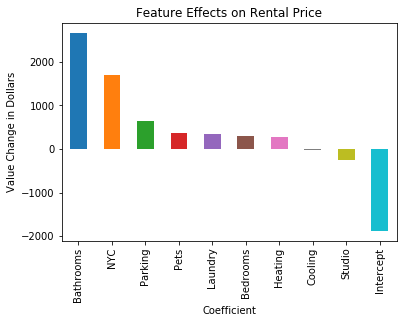

In [43]:
topRCV.plot(kind = 'bar', x='Coefficient', y='Values')
plt.legend().set_visible(False)
plt.ylabel('Value Change in Dollars');
plt.title('Feature Effects on Rental Price')
plt.savefig('TopRCVCoef_NYC.png')

In [68]:
LCV = LassoCV()
LCV.fit(X,Y)
print(LCV.score(X,Y))
print(RCV.score(X,Y))

0.618571414732415
0.6185712680477189


In [45]:
bedrooms = list(df['Bedrooms'])
rent = list(df['Rent'])
bathrooms = list(df['Bathrooms'])


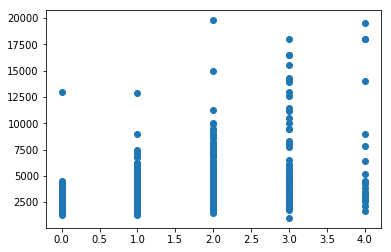

In [46]:
plt.scatter(bedrooms, rent)

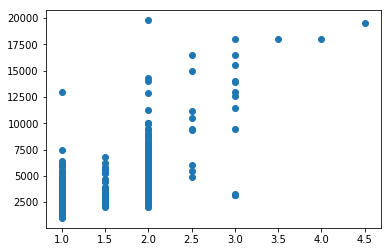

In [47]:
plt.scatter(bathrooms, rent)

In [48]:
LCV.intercept_

-1884.4310246098903

In [49]:
LCV_coef = list(LCV.coef_)

In [50]:
for i in range(len(LCV_coef)):
    LCV_coef[i] = round(LCV_coef[i] , 2)

In [51]:
LCV_coef

[296.08, 2678.47, -0.0, 243.03, 331.83, 364.7, 630.8, -257.13, 1706.97]

In [52]:
LCV_intercept = LCV.intercept_

In [53]:
LCV_intercept = round(LCV_intercept, 2)

In [54]:
LCV_intercept

-1884.43

In [55]:
column_list = df.columns.tolist()

In [56]:
coef_list = column_list[4:]

In [57]:
coef_list

['Bedrooms',
 'Bathrooms',
 'Cooling',
 'Heating',
 'Laundry',
 'Pets',
 'Parking',
 'Studio',
 'NYC']

In [58]:
data = {'Coefficient':coef_list , 'Values':LCV_coef }

In [59]:
results_table = pd.DataFrame(data=data)

In [60]:
results_table

,Coefficient,Values
0,Bedrooms,296.08
1,Bathrooms,2678.47
2,Cooling,-0.00
3,Heating,243.03
4,Laundry,331.83
5,Pets,364.70
6,Parking,630.80
7,Studio,-257.13
8,NYC,1706.97


In [61]:
results_table = results_table.append({'Coefficient': 'Intercept', 'Values': LCV_intercept}, ignore_index=True)

In [62]:
results_table

,Coefficient,Values
0,Bedrooms,296.08
1,Bathrooms,2678.47
2,Cooling,-0.00
3,Heating,243.03
4,Laundry,331.83
5,Pets,364.70
6,Parking,630.80
7,Studio,-257.13
8,NYC,1706.97
9,Intercept,-1884.43


In [65]:
top = results_table.sort_values(['Values'], ascending = False)
#top = top.drop(columns = ['index'])
top

,Coefficient,Values
1,Bathrooms,2678.47
8,NYC,1706.97
6,Parking,630.80
5,Pets,364.70
4,Laundry,331.83
0,Bedrooms,296.08
3,Heating,243.03
2,Cooling,-0.00
7,Studio,-257.13
9,Intercept,-1884.43


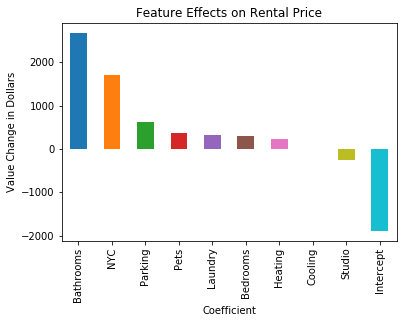

In [67]:
top.plot(kind = 'bar', x='Coefficient', y='Values')
plt.legend().set_visible(False)
plt.ylabel('Value Change in Dollars');
plt.title('Feature Effects on Rental Price')
plt.savefig('TopCoefLCV_NYC.png')